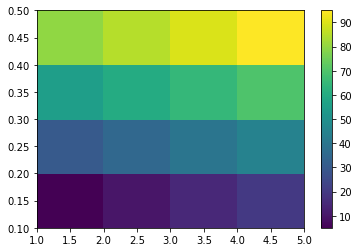

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#here's our data to plot, all normal Python lists
x = [1, 2, 3, 4, 5]
y = [0.1, 0.2, 0.3, 0.4, 0.5]

intensity = [
    [5, 10, 15, 20, 25],
    [30, 35, 40, 45, 50],
    [55, 60, 65, 70, 75],
    [80, 85, 90, 95, 100],
    [105, 110, 115, 120, 125]
]

#setup the 2D grid with Numpy
x, y = np.meshgrid(x, y)

#convert intensity (list of lists) to a numpy array for plotting
intensity = np.array(intensity)

#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boom

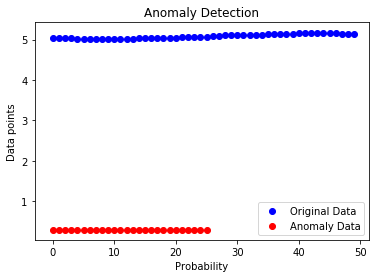

In [6]:
import pandas as pd

org = pd.read_table("Original_data.txt")
ana = pd.read_table("Anomaly_points.txt")
        
org = np.abs(org)
ana = np.abs(ana)
    
test_org = org[10000:10050]
    
    
fig, ax = plt.subplots()
ax.scatter(np.arange(0, len(test_org), 1), test_org, color='blue', marker='o', label = "Original Data")
ax.scatter(np.arange(0, len(ana), 1), ana, color='red', marker='o', label = "Anomaly Data")
ax.set_title('Anomaly Detection')
    
ax.set_xlabel('Probability')
ax.set_ylabel('Data points')
    
plt.legend()
plt.show()

In [9]:
a = [10,20,30,40,50,35,70,89]
for i in a:
    print a.index(i)

0
1
2
3
4
5
6
7


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

import itertools
import scipy as sp
from scipy import linalg
import matplotlib as mpl

from itertools import product
from scipy import stats

import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/a.csv', sep=',')

In [3]:
X = df[["V1","V2","V3","I1","I2","I3","Pges","Sges","CosPhi"]]

In [27]:
def add_anomaly_dynamically(num,x,count,mid_pos):
    t_num = list(num)
    if (mid_pos + count >= len(t_num)) and (mid_pos - count < 0):
        print "Point of injection is not suitable for injecting anomalies"
    else:
        #t_num.sort()
        last_idx = len(t_num)
        delta = 1.0 + (float(x)/float(100))
        new_list_test = [t_num[mid_pos]]
        for j in range(0,count):
            a = mid_pos - j
            b = mid_pos + j
            new_list_test.append(t_num[a])
            new_list_test.append(t_num[b])
            new_list_test.sort()
        mu = len(new_list_test)/2 
        increment = new_list_test[mu] * delta
        
        for k in range(mid_pos-count,mid_pos+count+1):
            if k == mid_pos:
                t_num[k] = increment
            else:
                increment_new = increment - new_list_test[mu]
                share = abs(mid_pos - k )
                t_num[k] = t_num[k] + increment_new * (1.0 - (float(share)/float(mu)))
    return t_num 

In [28]:
X

,V1,V2,V3,I1,I2,I3,Pges,Sges,CosPhi
0,231.48,230.68,231.13,28.62,85.35,67.17,40634.93,41954.64,0.90
1,232.55,231.93,232.12,42.26,59.70,55.55,34041.65,36562.76,0.92
2,235.39,234.91,234.56,46.28,48.49,50.96,31277.35,34297.96,0.91
3,231.87,231.05,231.39,69.17,92.45,89.39,56084.99,58069.81,0.96
4,232.40,231.82,231.79,77.44,93.10,81.21,54859.91,58391.86,0.94


In [30]:
#add_anomaly_dynamically(num,x,count,mid_pos):
df_new = pd.DataFrame()
for i in range(X.shape[1]):
    df_new[i] = add_anomaly_dynamically(X.iloc[:,i],10,2,2)
df_new

,0,1,2,3,4,5,6,7,8
0,231.4800,230.6800,231.130,28.620,85.3500,67.170,40634.9300,41954.640,0.9000
1,244.3195,243.6755,243.848,44.574,62.1245,58.098,35605.5175,38277.658,0.9655
2,258.9290,258.4010,258.016,50.908,53.3390,56.056,34405.0850,37727.756,1.0010
3,243.6395,242.7955,243.118,71.484,94.8745,91.938,57648.8575,59784.708,1.0055
4,232.4000,231.8200,231.790,77.440,93.1000,81.210,54859.9100,58391.860,0.9400


In [14]:
X.iloc[:,0]

0    231.48
1    232.55
2    235.39
3    231.87
4    232.40
Name: V1, dtype: float64